<a href="https://colab.research.google.com/github/ynebin/class2023Fall/blob/main/W12_1117.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# librosa

In [1]:
import os

wav_url = "https://raw.githubusercontent.com/ynebin/class2023Fall/main/aeiou.wav"
os.system("curl " + wav_url + " > audio.wav")

0

## load

In [2]:
import librosa

audio, sr = librosa.load("audio.wav", sr=44100)  # returns audio and sample rate

## plot

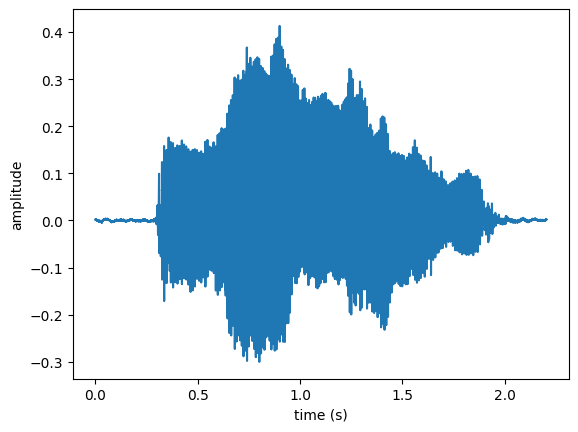

In [3]:
# 1. using pyplot

from matplotlib import pyplot as plt
import numpy as np

time = np.arange(audio.shape[0]) / sr  # time in seconds

plt.plot(time, audio)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.show()

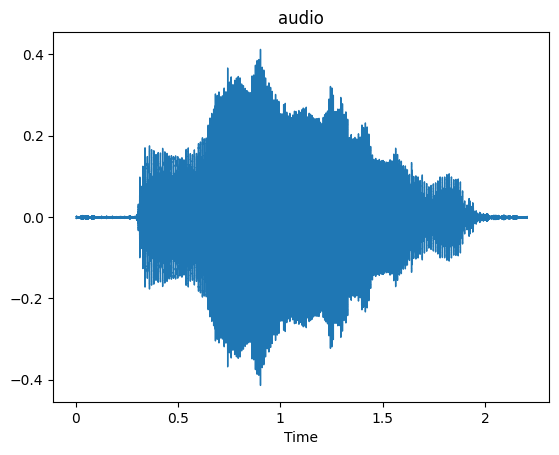

In [4]:
# 2. using librosa

librosa.display.waveshow(audio, sr=sr)
plt.title("audio")
plt.show()

## normalize

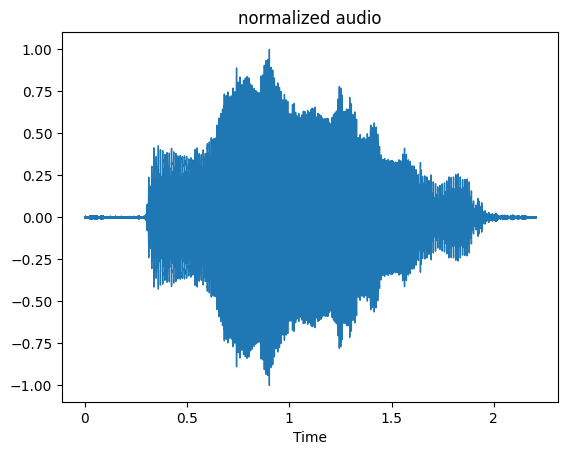

In [5]:
audio = librosa.util.normalize(audio)  # amplitude range between -1 ~ 1

librosa.display.waveshow(audio, sr=sr)
plt.title("normalized audio")
plt.show()

## pre-emphasis

In [6]:
audio_pre = librosa.effects.preemphasis(audio)  # boosts the higher frequency components

## short-time fourier transform

In [7]:
# spectrogram from an audio (pre-emphasis X)

n_fft = 2048
hop_length = 512
win_length = 2048

spec = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
spec = np.abs(spec) ** 2  # only amplitudes are needed
spec_db = librosa.power_to_db(spec, ref=np.max)  # amplitude -> dB

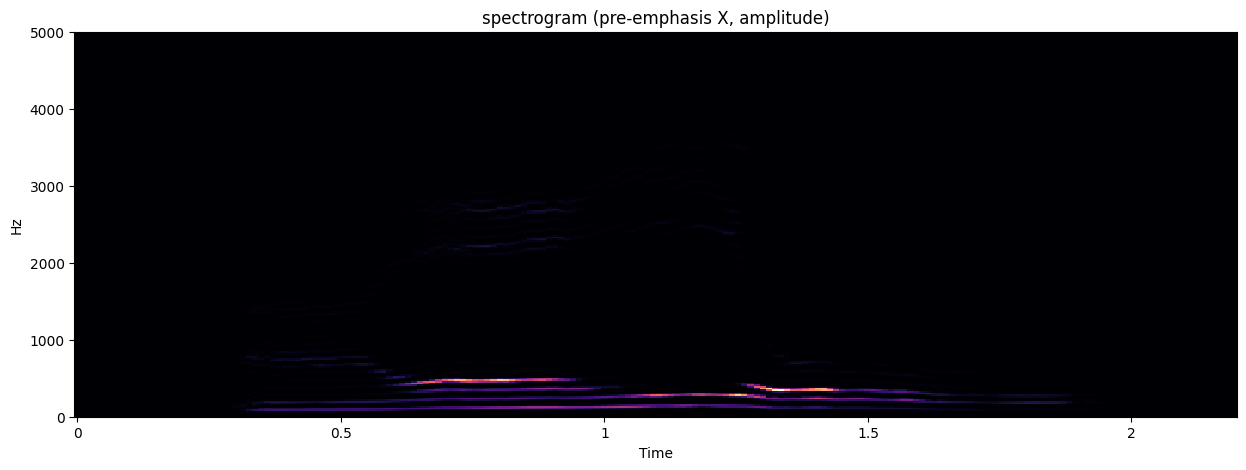

In [8]:
plt.figure(figsize=(15, 5))
plt.ylim([0, 5000])
librosa.display.specshow(spec, sr=sr, x_axis="time", y_axis="linear")
plt.title("spectrogram (pre-emphasis X, amplitude)")
plt.show()

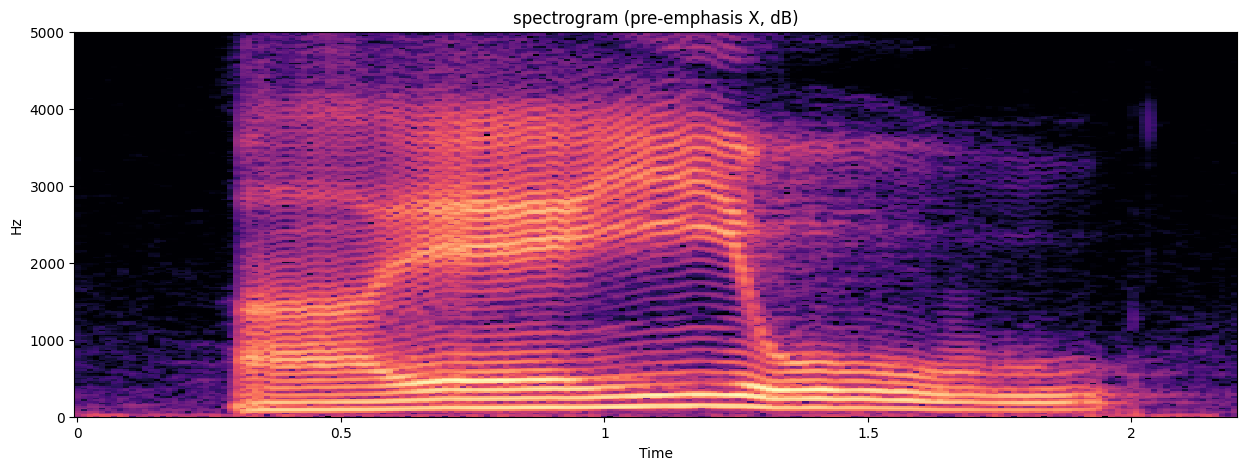

In [9]:
plt.figure(figsize=(15, 5))
plt.ylim([0, 5000])
librosa.display.specshow(spec_db, sr=sr, x_axis="time", y_axis="linear")
plt.title("spectrogram (pre-emphasis X, dB)")
plt.show()

In [10]:
# spectrogram from an audio (pre-emphasis)

n_fft = 2048
hop_length = 512
win_length = 2048

spec = librosa.stft(audio_pre, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
spec = np.abs(spec) ** 2  # only amplitudes are needed
spec_db = librosa.power_to_db(spec, ref=np.max)  # amplitude -> dB

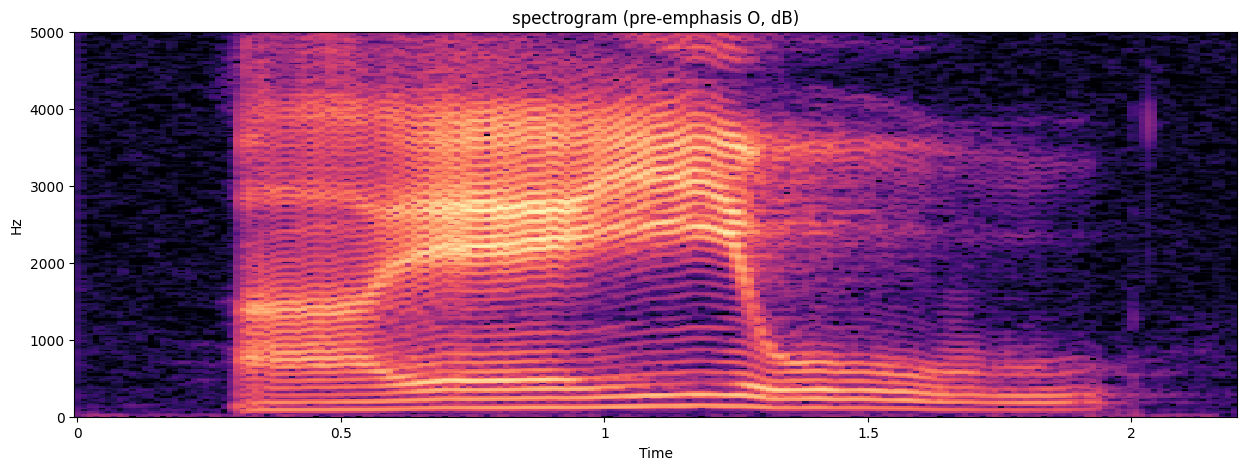

In [11]:
plt.figure(figsize=(15, 5))
plt.ylim([0, 5000])
librosa.display.specshow(spec_db, sr=sr, x_axis="time", y_axis="linear")
plt.title("spectrogram (pre-emphasis O, dB)")
plt.show()

## mel-scale spectrogram

In [12]:
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=n_fft, fmax=8000, n_mels=128)
mel_spec = np.matmul(mel_filterbank, spec)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # amplitude -> dB

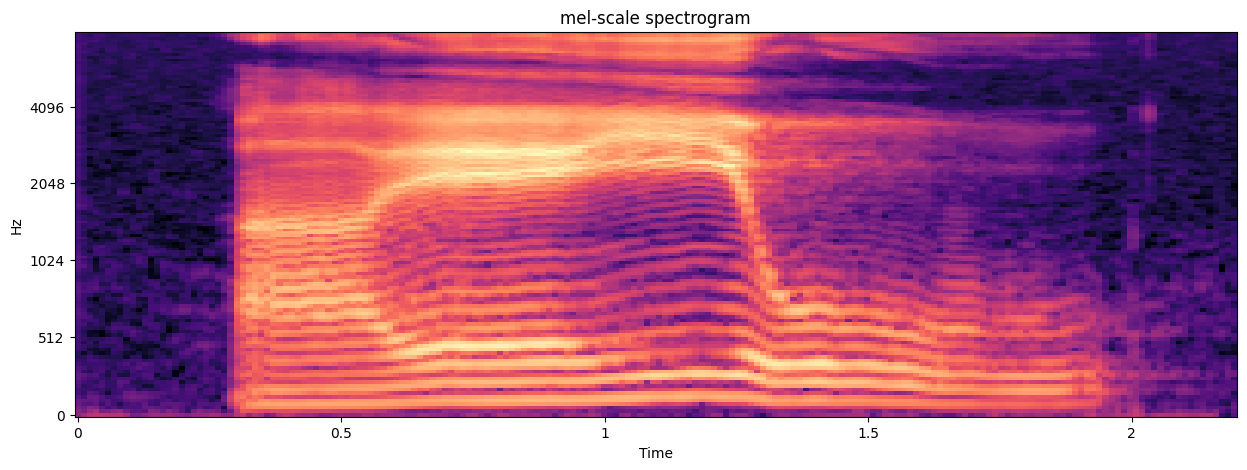

In [13]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", fmax=8000)
plt.title("mel-scale spectrogram")
plt.show()

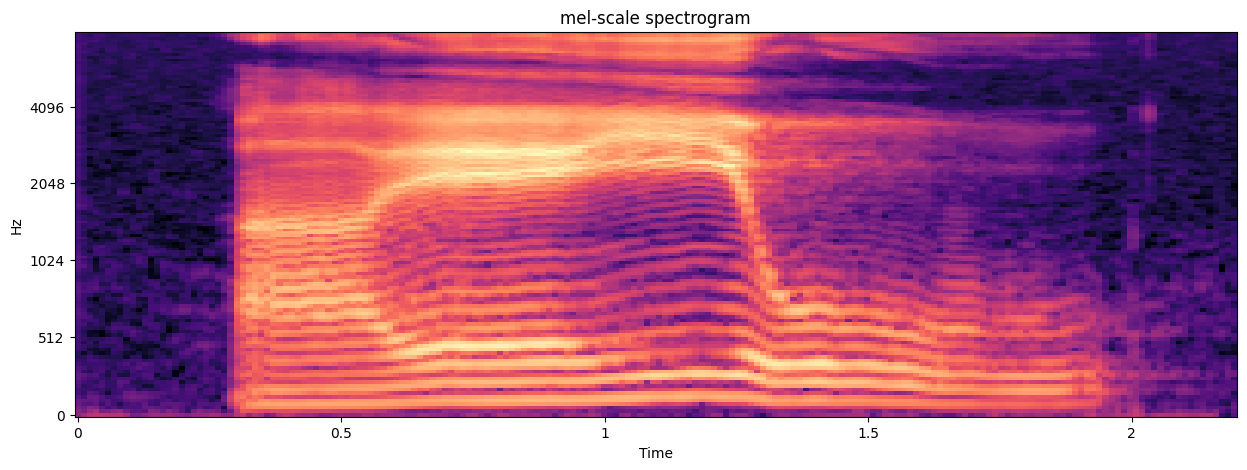

In [14]:
mel_spec = librosa.feature.melspectrogram(sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length, fmax=8000, S=spec)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # amplitude -> dB

plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis="time", y_axis="mel", fmax=8000)
plt.title("mel-scale spectrogram")
plt.show()